## BÀI KIỂM TRA GIỮA KÌ
* Môn: **Linear Algebra**
* Thời gian: **90 phút**
* Họ tên học viên: Nguyễn Xuân Hoàng
* Mã học viên: 3694709 

**Yêu cầu**: Sử dụng tính toán trên Python để hoàn thành các bài tập sau đây.

### Bài 1 (2đ)
Cho hai ma trận $A$ và $B$ như sau:
$$A=\begin{pmatrix}
2 & 1 & -3\\
5 & -4 & 3\\
2 & -10 & 6
\end{pmatrix},\ \ B=\begin{pmatrix}
3 & 2 & -4\\
-2 & 5 & 2\\
11 & 3 & 1
\end{pmatrix}$$
* Tạo ma trận khối: $C=\left[\begin{matrix}
I & A\\
-I & B
\end{matrix}\right]$, trong đó $I$ là ma trận đơn vị.
* Tính định thức của ma trận $C$, và so sánh với định thức của ma trận $(A+B)$. Kết quả đó có đúng với mọi $A$ và $B$ vuông cùng cấp hay không? Tại sao?

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [1]:
#matrix A 
A = np.array([2,1,-3,5,-4,3,2,-10,6]).reshape(3,3)
print('Ma tran A', A, sep = '\n')
#matrix B
B = np.array([3,2,-4,-2,5,2,11,3,1]).reshape(3,3)
print('Ma tran B', B, sep = '\n')


Ma tran A
[[  2   1  -3]
 [  5  -4   3]
 [  2 -10   6]]
Ma tran B
[[ 3  2 -4]
 [-2  5  2]
 [11  3  1]]


In [3]:
I = np.identity(3)
C = np.vstack([np.hstack([I,A]), np.hstack([-1*I,B])])
print("Ma trận khối C la:")
print(C)

Ma trận khối C la:
[[  1.   0.   0.   2.   1.  -3.]
 [  0.   1.   0.   5.  -4.   3.]
 [  0.   0.   1.   2. -10.   6.]
 [ -1.  -0.  -0.   3.   2.  -4.]
 [ -0.  -1.  -0.  -2.   5.   2.]
 [ -0.  -0.  -1.  11.   3.   1.]]


In [5]:
print("det(C)=", np.linalg.det(C))
print("det(A+B)=", np.linalg.det(A+B))

det(C)= 580.0
det(A+B)= 580.0


Nhận thấy $det(C) = det(A+B)$ trong biểu thức trên. 
Kết quả này đúng với mọi A và B vuông cùng cấp

### Bài 2 (2đ)
Trong mặt phẳng toạ độ $(x,y)$ cho các điểm sau đây:
$$(-1,-3),\ (0,2),\ (1,1),\ (2,0),\ (3,5)$$
Cho đa thức dưới dạng:
$$p=\alpha_0+\alpha_1 p_1+\alpha_2 p_2+\alpha_3 p_3+\alpha_4 p_4$$
trong đó
$$\left\{\begin{matrix}
p_1 = x \\ p_2 = 1+2x^2 \\ p_3 = x^3 - x + 1 \\ p_4 = (x-1)(x+1)
\end{matrix}\right.$$
* Hãy tìm 1 bộ số $(\alpha_0,\alpha_1,\alpha_2,\alpha_3,\alpha_4)$ sao cho đa thức $p$ đi qua tất cả các điểm dữ liệu được cho.
* Đa thức $p$ như trên có tồn tại duy nhất hay không?

In [74]:
#Các đa thức 
p1 = lambda x: x
p2 = lambda x: 1+2*pow(x,2)
p3 = lambda x: pow(x,3)-x+1
p4 = lambda x: (x-1)*(x+1)

A=np.array([1 for x in range(1,6)])
temp = [-1,0,1,2,3]
col1=np.array([p1(x) for x in temp])
col2=np.array([p2(x) for x in temp])
col3=np.array([p3(x) for x in temp])
col4 = np.array([p4(x) for x in temp])
A=np.vstack([A,col1,col2,col3, col4]).T
print(A)
#Vector b
b=np.array([-3,2,1,0,5])
a =np.linalg.lstsq(A,b)
# print("Đa thức nội suy: y(x)=%0.2f+%0.2f*x+%0.2f*x^2+%0.2f*x^3"%c)
print('Bộ số cần tìm là: ', a[0])

[[ 1 -1  3  1  0]
 [ 1  0  1  1 -1]
 [ 1  1  3  1  0]
 [ 1  2  9  7  3]
 [ 1  3 19 25  8]]
Bộ số cần tìm là:  [ 0.57142857  2.         -0.85714286  1.         -1.28571429]


C:\Users\hoangnx8\AppData\Local\Temp\ipykernel_22376\4012544353.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a =np.linalg.lstsq(A,b)


In [77]:
# Kiểm tra số nghiệm của hệ phương trình
A_m = np.hstack([A, b.reshape(-1, 1)])

print("Rank của ma trận A là:", np.linalg.matrix_rank(A))
print("Rank của ma trận A khi ghép thêm cột b là:", np.linalg.matrix_rank(A_m))

Rank của ma trận A là: 4
Rank của ma trận A khi ghép thêm cột b là: 4


=> Hệ có vô số nghiệm. Đa thức $p$ không tồn tại duy nhất

### Bài 3 (2đ)
Ma trận vuông được gọi là **ma trận ngẫu nhiên cột** nếu tất cả các phần tử của nó không âm và các phần tử trong mỗi cột có tổng bằng 1.
* Hãy khởi tạo (ngẫu nhiên) một ma trận $A$ vuông cấp 5 là ma trận ngẫu nhiên cột.
* Có tồn tại véc tơ $X$ thoả mãn: $AX = X$ hay không?
* Nếu có, hãy tìm véc tơ $X$ thoả mãn với điều kiện thành phần cuối cùng $X[-1]$ bằng 1.

In [81]:
def generate(n):
    A = np.zeros((n, n))
    for i in range(n):
        sum = 0
        for j in range(n - 1):
            random_num = np.random.random()
            while sum + random_num > 1:
                random_num = np.random.random()
            
            sum += random_num
            A[j][i] = random_num
        A[n - 1][i] = 1 - sum
        
    return A


In [82]:
# Khoi tạo ngẫu nhiên ma trận vuông A cấp 5 la ma trận ngẫu nhiên cột
A = generate(5)
print("Ma trận ngẫu nhien cột A cấp 5 là:")
print(A)
print("Det(A - I) là:", np.round(np.linalg.det(A - np.eye(5))))

Ma trận ngẫu nhien cột A cấp 5 là:
[[3.20545131e-01 9.96396981e-01 2.46683825e-01 9.10516438e-01
  4.93113917e-01]
 [3.65829212e-01 1.52720168e-03 4.99209476e-01 5.50813819e-02
  9.25497632e-02]
 [2.79909348e-01 1.67763728e-03 2.11645184e-01 2.89588277e-02
  1.72449456e-01]
 [2.78895946e-02 1.23248073e-04 6.47035912e-03 2.23307716e-03
  7.93988973e-02]
 [5.82671470e-03 2.74932194e-04 3.59911553e-02 3.21027550e-03
  1.62487966e-01]]
Det(A - I) là: 0.0


Vì  $det(A - I) = 0$ nên $AX = X$ có vô số nghiệm

In [84]:
#Tim vecto X thoa man thanh phan cuoi 
X1 = A - np.eye(5)
y = np.zeros(5)

Mà: $a_1 x_1 + a_2x_2 + a_3x_3 + a_4(-1) = 0$ với $a_i$ là ma trận cột của X1

Do đó ta giải phương trình: $a_1x_1+a_2x_2+a_3x_3=a_4$

In [86]:
X = X1[:, :3]
y_1 = X1[:, 4]

alpha = np.linalg.lstsq(X, y_1)[0]
print("Nghiệm của phương trình là:", [alpha[0], alpha[1], alpha[2], -1])

Nghiệm của phương trình là: [-12.496379445405429, -6.933916633949953, -4.634715724299657, -1]


C:\Users\hoangnx8\AppData\Local\Temp\ipykernel_22376\1978160532.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha = np.linalg.lstsq(X, y_1)[0]


### Bài 4 (2đ)
Trong không gian $\mathbb{R}^4$ cho các véc tơ:

$$u_1=\begin{pmatrix}
1 \\ 2 \\ -3 \\ 1
\end{pmatrix},\ \ 
u_2=\begin{pmatrix}
-2 \\ 5 \\ 2 \\ -4
\end{pmatrix},\ \ 
u_3=\begin{pmatrix}
0 \\ 9 \\ -4 \\ -2
\end{pmatrix},\ \ 
u_4=\begin{pmatrix}
3 \\ 0 \\ 5 \\ 2
\end{pmatrix} $$

* Tìm số chiều và một cơ sở của không gian $U=Span(u_1,u_2,u_3,u_4)$.
* Bằng phương pháp Gram-Schmidt, hãy xây dựng một cơ sở trực chuẩn của không gian $U$.
* Tìm hình chiếu trực giao của véc tơ $y=\begin{pmatrix}
3 \\ 4 \\ 2 \\ 7
\end{pmatrix}$ trên không gian $U$.

In [60]:
u1 = np.array([1,2,-3,1])
u2 = np.array([-2,5,2,-4])
u3 = np.array([0,9,-4,-2])
u4 = np.array([3,0,5,2])
#Khong gian U
U = np.stack([u1, u2, u3, u4], axis=1)
print("Số chiều không gian U là:", np.linalg.matrix_rank(U))

Số chiều không gian U là: 3


In [61]:
# tìm cơ sở U sử dụng phân tích LU

U1 = np.around(linalg.lu(U)[2], 3)
print("Phân tích LU của U:")
print(U1)
print("Cơ sở của U là: ",U[:,0], U[:,1], U[:,3], sep='\n')

Phân tích LU của U:
[[-3.     2.    -4.     5.   ]
 [ 0.     6.333  6.333  3.333]
 [ 0.     0.     0.     5.421]
 [ 0.     0.     0.     3.075]]
Cơ sở của U là: 
[ 1  2 -3  1]
[-2  5  2 -4]
[3 0 5 2]


In [62]:
# Trực giao hóa Gram-Schimidt
a1 = u1
a2 = u2 - np.inner(u2,a1)/np.inner(a1,a1)*a1
#a3 = u3 - np.inner(u3,a1)/np.inner(a1,a1)*a1\
#         - np.inner(u3,a2)/np.inner(a2,a2)*a2
a4 = u4 - np.inner(u4,a1)/np.inner(a1,a1)*a1\
        - np.inner(u4,a2)/np.inner(a2,a2)*a2
#         - np.inner(u4,a3)/np.inner(a3,a3)*a3
# print(a1,a2,a3,a4,sep='\n')
print(a1,a2,a4,sep='\n')

[ 1  2 -3  1]
[-1.86666667  5.26666667  1.6        -3.86666667]
[3.4623803  1.90971272 3.1751026  2.24350205]


In [63]:
#Chuẩn hóa
e1 = a1/np.linalg.norm(a1)
e2 = a2/np.linalg.norm(a2)
# e3 = a3/np.linalg.norm(a3)
e4 = a4/np.linalg.norm(a4)
# print(e1,e2,e3,e4,sep = '\n')
print(e1,e2,e4,sep = '\n')

[ 0.25819889  0.51639778 -0.77459667  0.25819889]
[-0.26739527  0.75443664  0.22919594 -0.55389019]
[0.62438811 0.34438791 0.5725819  0.40458178]


In [72]:
# Kết luận: {e1,e2,e4} là cơ sở trực chuẩn của U
#tìm hình chiếu trực giao của y trên U 
y = np.array([3,4,2,7])
y_proj = np.inner(y,e1)*e1 + np.inner(y,e2)*e2 + np.inner(y,e4)*e4
print('Hình chiếu trực giao của y là', y_proj, sep ='\n')

Hình chiếu trực giao của y là
[5.63479847 3.18142183 1.46280808 4.3907821 ]


### Bài 5 (1đ)
Cho dữ liệu khảo sát về sự hài lòng của bệnh nhân đối với dịch vụ khám chữa bệnh của một bệnh viện:


<table>
  <thead>
    <tr>
      <th>Quan sát</th>
      <th>Tuổi ($x_1$)</th>
      <th>Tình trạng bệnh ($x_2$)</th>
      <th>Sự hài lòng ($y$)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>55</td>
      <td>50</td>
      <td>68</td>
    </tr>
    <tr>
      <td>2</td>
      <td>46</td>
      <td>24</td>
      <td>77</td>
    </tr>
    <tr>
      <td>3</td>
      <td>30</td>
      <td>46</td>
      <td>96</td>
    </tr>
    <tr>
      <td>4</td>
      <td>35</td>
      <td>48</td>
      <td>80</td>
    </tr>
    <tr>
      <td>5</td>
      <td>59</td>
      <td>58</td>
      <td>43</td>
    </tr>
    <tr>
      <td>6</td>
      <td>61</td>
      <td>60</td>
      <td>44</td>
    </tr>
    <tr>
      <td>7</td>
      <td>74</td>
      <td>65</td>
      <td>26</td>
    </tr>
    <tr>
      <td>8</td>
      <td>38</td>
      <td>42</td>
      <td>88</td>
    </tr>
    <tr>
      <td>9</td>
      <td>27</td>
      <td>42</td>
      <td>75</td>
    </tr>
    <tr>
      <td>10</td>
      <td>51</td>
      <td>50</td>
      <td>57</td>
    </tr>
  </tbody>
</table>

Hãy xây dựng hàm hồi quy tuyến tính thể hiện sự hài lòng ($y$) theo độ tuổi ($x_1$) và tình trạng bệnh ($x_2$) của các bệnh nhân.

In [68]:
x1 = np.array([55, 46, 30, 35, 59, 61, 74, 38, 27, 51])
x2 = np.array([50, 24, 46, 48, 58, 60, 65, 42, 42, 50])
y = np.array([68, 77, 96, 80, 43, 44, 26, 88, 75, 57])

In [69]:
# Ma trận X
X = np.vstack([np.ones(len(x1)), x1, x2]).T
print(X)

[[ 1. 55. 50.]
 [ 1. 46. 24.]
 [ 1. 30. 46.]
 [ 1. 35. 48.]
 [ 1. 59. 58.]
 [ 1. 61. 60.]
 [ 1. 74. 65.]
 [ 1. 38. 42.]
 [ 1. 27. 42.]
 [ 1. 51. 50.]]


In [70]:
# Phương pháp bình phương tối thiểu để tìm hệ số 
a = np.linalg.lstsq(X, y)[0]
print(a)
print('Hàm hồi quy tuyến tính cần tìm là:', round(a[0],2), '+', round(a[1],2), 'x1', round(a[2],2), 'x2')

[141.89395861  -1.08457084  -0.51275024]
Hàm hồi quy tuyến tính cần tìm là: 141.89 + -1.08 x1 -0.51 x2


C:\Users\hoangnx8\AppData\Local\Temp\ipykernel_22376\794936460.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, y)[0]


### Bài 6 (1đ)
Khi ma trận $A$ có các cột độc lập tuyến tính, nghiệm bình phương tối thiểu $\widehat{x}=(A^TA)^{-1}A^Tb$ của hệ phương trình $Ax=b$ sẽ cực tiểu hóa $\|Ax-b\|^2$.

Ta có thể tìm nghiệm $\widehat{x}$ bằng phương pháp lặp **Richardson**:

$$x^{(k+1)}=x^{(k)}-\lambda A^T(Ax^{(k)}-b), \ \ x^{(1)}=0$$

ở đó $\lambda>0$ không quá lớn và $k$ chỉ số bước lặp.

Cho các ma trận 
$$A=\begin{pmatrix}
1 & 1 & -1 & -1\\
2 & 5 & -7 & -5\\
2 & -1 & 1 & 3 \\
5 & 2 & -4 & 2 \\
-3 & 3 & 5 & 2
\end{pmatrix},\ \ B=\begin{pmatrix}
1 \\ -2 \\ 4 \\ 6 \\ -4
\end{pmatrix}$$
* Tính nghiệm bình phương cực tiểu $\widehat{x}$.
* Sử dụng phương pháp lặp Richardson để tính dãy nghiệm xấp xỉ với 1000 bước lặp. Chọn $\lambda=0.01$.
* Vẽ đồ thị $\|x^{(k)}-\widehat{x}\|$ để kiểm tra xem $x^{(k)}$ có hội tụ về $\widehat{x}$ hay không?

In [49]:
#Matrix A và B
A = np.array([1, 1, -1, -1, 2, 5, -7, -5,2, -1, 1, 3,5, 2, -4, 2,-3, 3, 5, 2]).reshape(5,4)
B = np.array([1, -2, 4, 6, -4])
A,B

(array([[ 1,  1, -1, -1],
        [ 2,  5, -7, -5],
        [ 2, -1,  1,  3],
        [ 5,  2, -4,  2],
        [-3,  3,  5,  2]]),
 array([ 1, -2,  4,  6, -4]))

In [50]:
#Nghiệm bình phương cực tiểu x^

x = np.linalg.inv(A.T @ A) @ A.T @ B
print("Nghiệm bình phương cực tiểu là:", x, sep = '\n')

Nghiệm bình phương cực tiểu là:
[ 1.7254902  -0.40196078  0.48319328 -0.01680672]


In [51]:
# Sử dụng phương pháp lặp Richardson
landa = 0.01
x_richard = np.zeros((4, 1))
sai_khac = []

B = B.reshape(-1, 1)
steps = 1000

for step in range(steps):
    x_richard = x_richard - landa * A.T @ (A @ x_richard - B)
    sai_khac.append(np.linalg.norm(x_richard - x.reshape(-1, 1)))
    
print("Nghiệm theo phương pháp lặp là:",x_richard, sep ='\n')


Nghiệm theo phương pháp lặp là:
[[ 1.71529571]
 [-0.40232405]
 [ 0.47390074]
 [-0.00825613]]


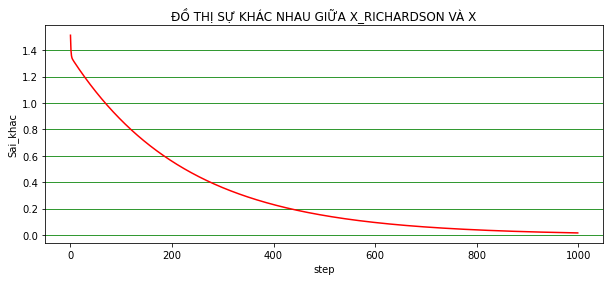

In [52]:
# Ve do thi 
plt.figure(figsize=(10, 4))
plt.plot(diff, color = 'red')

plt.title("ĐỒ THỊ SỰ KHÁC NHAU GIỮA X_RICHARDSON VÀ X")
plt.xlabel('step')
plt.ylabel('Sai_khac')
plt.grid(axis='y', color  = 'g')
plt.show()


Dựa vào đồ thị ta thấy $x^{(k)}$ có hội tụ về $\widehat{x}$ 